In [3]:
import pandas as pd
import json
from datetime import datetime

In [4]:
# Load the accelerometer data
with open('../data/raw/player_107631_accelerometer.json', 'r') as f:
    acc_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(acc_data)

# Convert timestamp to datetime
df['ts'] = pd.to_datetime(df['ts'], unit='ms')

# Display the first few rows
df.head()

,ts,x,y,z,activity_id,activity_date
0,2025-04-28 01:37:46.692,-0.181855,-0.244068,9.659825,3312957,1745804326000
1,2025-04-28 01:37:46.704,-0.191426,-0.279960,9.731609,3312957,1745804326000
2,2025-04-28 01:37:46.706,-0.172283,-0.244068,9.667004,3312957,1745804326000
3,2025-04-28 01:37:46.707,-0.165105,-0.277567,9.707682,3312957,1745804326000
4,2025-04-28 01:37:46.707,-0.244068,-0.248854,9.714860,3312957,1745804326000


In [5]:
# Extract date from timestamp and count data points per day
df['date'] = df['ts'].dt.date
daily_counts = df.groupby('date').size().reset_index(name='count')

# Sort by count in descending order
daily_counts = daily_counts.sort_values('count', ascending=False)

# Display the top 10 days with most data points
print("Top 10 days with most data points:")
print(daily_counts.head(10))

# Display some basic statistics
print("\nStatistics about daily data points:")
print(f"Total number of days: {len(daily_counts)}")
print(f"Average data points per day: {daily_counts['count'].mean():.2f}")
print(f"Maximum data points in a day: {daily_counts['count'].max()}")
print(f"Minimum data points in a day: {daily_counts['count'].min()}")

Top 10 days with most data points:
         date   count
1  2025-04-10  382896
2  2025-04-11  324430
0  2025-04-09  225937
3  2025-04-12  187617
4  2025-04-27   91348
5  2025-04-28   20542

Statistics about daily data points:
Total number of days: 6
Average data points per day: 205461.67
Maximum data points in a day: 382896
Minimum data points in a day: 20542


C:\Users\20236075\AppData\Local\Temp\ipykernel_9564\3609284087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_april12['hour'] = df_april12['ts'].dt.hour


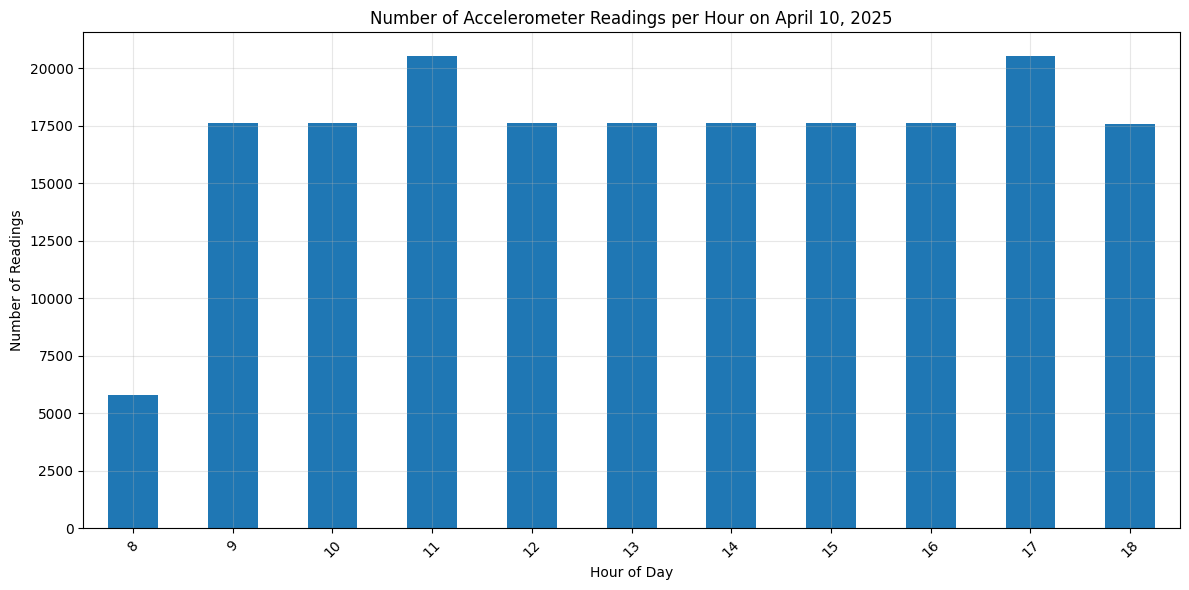

Total readings on April 12, 2025: 187617
Average readings per hour: 7817.38
Hour with most readings: 17:00 (20528 readings)
Hour with least readings: 8:00 (5813 readings)


In [7]:
# Filter data for April 12, 2025
df_april12 = df[df['ts'].dt.date == pd.to_datetime('2025-04-12').date()]

# Create hourly counts
df_april12['hour'] = df_april12['ts'].dt.hour
hourly_counts = df_april12.groupby('hour').size()

# Create the plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Number of Accelerometer Readings per Hour on April 10, 2025')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Readings')
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add some padding to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics
print(f"Total readings on April 12, 2025: {len(df_april12)}")
print(f"Average readings per hour: {len(df_april12)/24:.2f}")
print(f"Hour with most readings: {hourly_counts.idxmax()}:00 ({hourly_counts.max()} readings)")
print(f"Hour with least readings: {hourly_counts.idxmin()}:00 ({hourly_counts.min()} readings)")

Statistics for readings between 7 AM and 3 PM on April 11, 2025:
Mean time between readings: 0.19 seconds
Median time between readings: 0.02 seconds
Total number of readings in this period: 114330


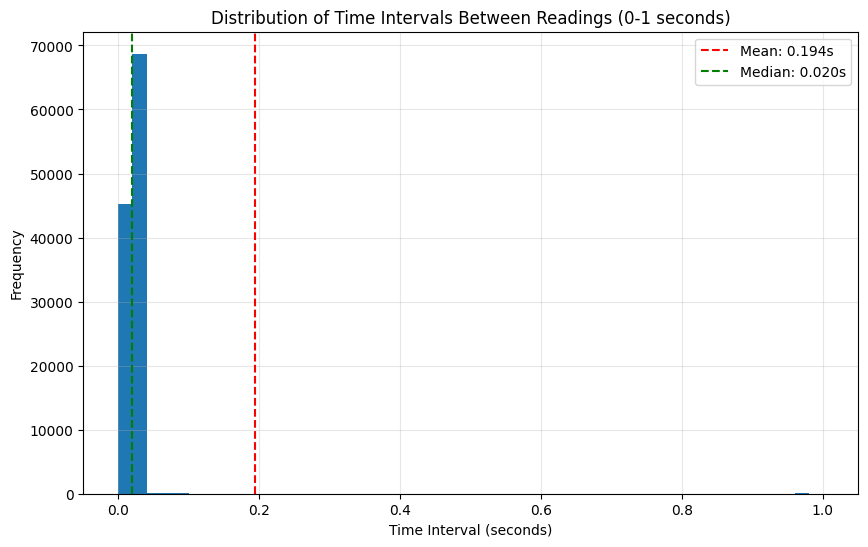


Percentage of intervals between 0-1 second: 99.97%


In [8]:
# Filter data for April 10, 2025 between 7 AM and 3 PM
df_april12 = df[df['ts'].dt.date == pd.to_datetime('2025-04-12').date()]
df_time_window = df_april12[(df_april12['ts'].dt.hour >= 7) & (df_april12['ts'].dt.hour < 15)]

# Sort by timestamp to ensure correct order
df_time_window = df_time_window.sort_values('ts')

# Calculate time differences between consecutive readings
time_diffs = df_time_window['ts'].diff()
time_diffs_seconds = time_diffs.dt.total_seconds()

# Calculate mean and median
mean_interval = time_diffs_seconds.mean()
median_interval = time_diffs_seconds.median()

print(f"Statistics for readings between 7 AM and 3 PM on April 11, 2025:")
print(f"Mean time between readings: {mean_interval:.2f} seconds")
print(f"Median time between readings: {median_interval:.2f} seconds")
print(f"Total number of readings in this period: {len(df_time_window)}")

# Create histogram with focus on 0-1 second range
plt.figure(figsize=(10, 6))
plt.hist(time_diffs_seconds.dropna(), bins=50, range=(0, 1))
plt.title('Distribution of Time Intervals Between Readings (0-1 seconds)')
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add mean and median lines
plt.axvline(mean_interval, color='r', linestyle='--', label=f'Mean: {mean_interval:.3f}s')
plt.axvline(median_interval, color='g', linestyle='--', label=f'Median: {median_interval:.3f}s')
plt.legend()

plt.show()

# Print percentage of intervals within 0-1 second range
intervals_0_1 = time_diffs_seconds[(time_diffs_seconds >= 0) & (time_diffs_seconds <= 1)]
percentage = (len(intervals_0_1) / len(time_diffs_seconds.dropna())) * 100
print(f"\nPercentage of intervals between 0-1 second: {percentage:.2f}%")

Statistics for readings between 7 AM and 3 PM on April 10, 2025:
Mean time between readings (≤1s): 0.019 seconds
Median time between readings (≤1s): 0.020 seconds
Total number of readings in this period: 212978
Number of intervals ≤1s: 212910
Number of intervals >1s: 68


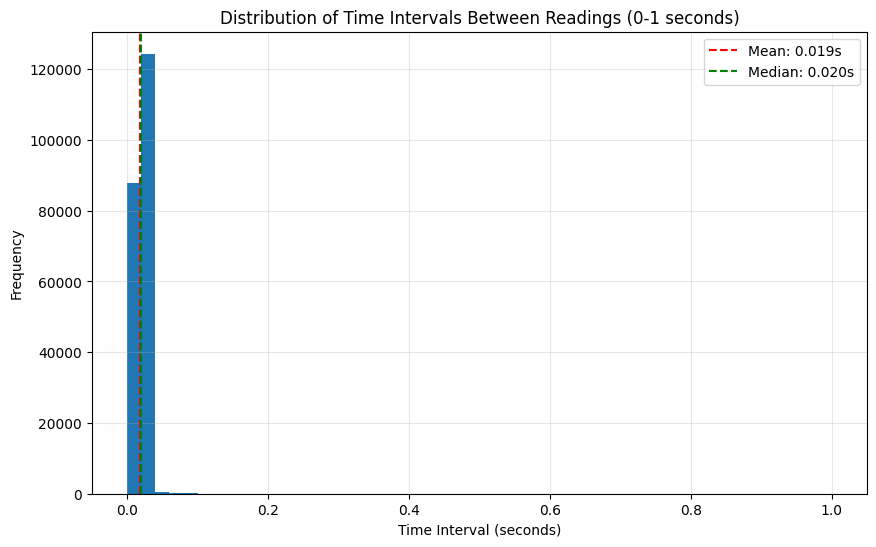


Percentage of intervals between 0-1 second: 99.97%


In [15]:
# Filter data for April 10, 2025 between 7 AM and 3 PM
df_april11 = df[df['ts'].dt.date == pd.to_datetime('2025-04-11').date()]
df_time_window = df_april11[(df_april11['ts'].dt.hour >= 7) & (df_april11['ts'].dt.hour < 15)]

# Sort by timestamp to ensure correct order
df_time_window = df_time_window.sort_values('ts')

# Calculate time differences between consecutive readings
time_diffs = df_time_window['ts'].diff()
time_diffs_seconds = time_diffs.dt.total_seconds()

# Filter intervals <= 1 second for statistics
valid_intervals = time_diffs_seconds[time_diffs_seconds <= 1]

# Calculate mean and median for intervals <= 1 second
mean_interval = valid_intervals.mean()
median_interval = valid_intervals.median()

print(f"Statistics for readings between 7 AM and 3 PM on April 10, 2025:")
print(f"Mean time between readings (≤1s): {mean_interval:.3f} seconds")
print(f"Median time between readings (≤1s): {median_interval:.3f} seconds")
print(f"Total number of readings in this period: {len(df_time_window)}")
print(f"Number of intervals ≤1s: {len(valid_intervals)}")
print(f"Number of intervals >1s: {len(time_diffs_seconds) - len(valid_intervals)}")

# Create histogram with focus on 0-1 second range
plt.figure(figsize=(10, 6))
plt.hist(valid_intervals, bins=50, range=(0, 1))
plt.title('Distribution of Time Intervals Between Readings (0-1 seconds)')
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add mean and median lines
plt.axvline(mean_interval, color='r', linestyle='--', label=f'Mean: {mean_interval:.3f}s')
plt.axvline(median_interval, color='g', linestyle='--', label=f'Median: {median_interval:.3f}s')
plt.legend()

plt.show()

# Print percentage of intervals within 0-1 second range
percentage = (len(valid_intervals) / len(time_diffs_seconds.dropna())) * 100
print(f"\nPercentage of intervals between 0-1 second: {percentage:.2f}%")

I want to understand if the number of readings is higher where the values of x, y, and z change more. In other words, if the time interval between two consecutive readings is shorter when the values of x, y, and z vary more. Provide an insightful plot and supplementary statistics

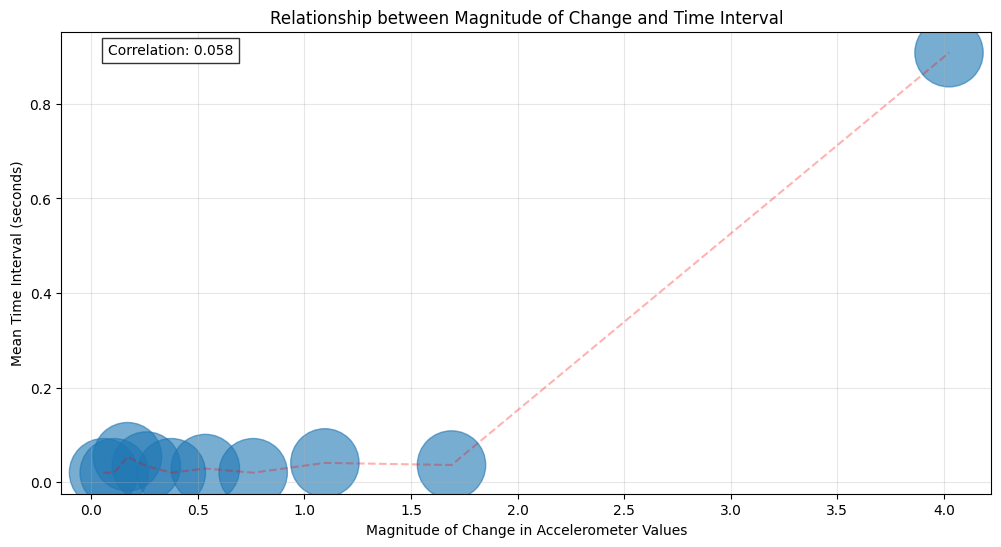


Detailed Statistics:
Correlation between magnitude of change and time interval: 0.058

Statistics by magnitude of change (10 bins):
  magnitude_bin time_diff               total_diff
                     mean median  count       mean
0             0  0.020401   0.02  24220   0.057332
1             1  0.020310   0.02  24220   0.107279
2             2  0.054207   0.02  24219   0.169660
3             3  0.034476   0.02  24220   0.258083
4             4  0.020362   0.02  24220   0.375469
5             5  0.029205   0.02  24219   0.535136
6             6  0.020371   0.02  24220   0.759453
7             7  0.041106   0.02  24219   1.095934
8             8  0.036642   0.02  24220   1.690048
9             9  0.907848   0.02  24220   4.024378

Additional Statistics:
Mean time interval for top 25% of changes: 0.382 seconds
Mean time interval for bottom 25% of changes: 0.034 seconds


<Figure size 1200x600 with 0 Axes>

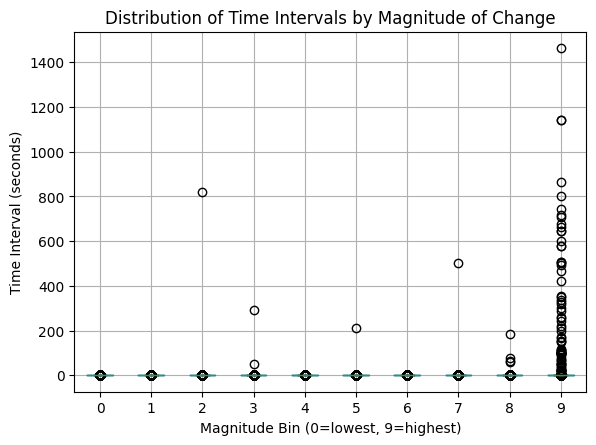

In [10]:
# Filter data for April 10, 2025 between 7 AM and 3 PM
df_april10 = df[df['ts'].dt.date == pd.to_datetime('2025-04-10').date()]
df_time_window = df_april10[(df_april10['ts'].dt.hour >= 7) & (df_april10['ts'].dt.hour < 15)]

# Sort by timestamp to ensure correct order
df_time_window = df_time_window.sort_values('ts')

# Calculate time differences between consecutive readings
df_time_window['time_diff'] = df_time_window['ts'].diff().dt.total_seconds()

# Calculate the magnitude of change in accelerometer values
df_time_window['x_diff'] = df_time_window['x'].diff().abs()
df_time_window['y_diff'] = df_time_window['y'].diff().abs()
df_time_window['z_diff'] = df_time_window['z'].diff().abs()

# Calculate total magnitude of change
df_time_window['total_diff'] = (df_time_window['x_diff']**2 + 
                               df_time_window['y_diff']**2 + 
                               df_time_window['z_diff']**2)**0.5

# Remove the first row (NaN values from diff)
df_time_window = df_time_window.dropna()

# Create bins for the magnitude of change
df_time_window['magnitude_bin'] = pd.qcut(df_time_window['total_diff'], q=10, labels=False)

# Calculate mean time interval for each magnitude bin
bin_stats = df_time_window.groupby('magnitude_bin').agg({
    'time_diff': ['mean', 'median', 'count'],
    'total_diff': 'mean'
}).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot mean time interval vs magnitude of change
plt.scatter(bin_stats['total_diff'], bin_stats[('time_diff', 'mean')], 
           s=bin_stats[('time_diff', 'count')]/10, alpha=0.6)
plt.plot(bin_stats['total_diff'], bin_stats[('time_diff', 'mean')], 'r--', alpha=0.3)

plt.title('Relationship between Magnitude of Change and Time Interval')
plt.xlabel('Magnitude of Change in Accelerometer Values')
plt.ylabel('Mean Time Interval (seconds)')
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = df_time_window['total_diff'].corr(df_time_window['time_diff'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print(f"Correlation between magnitude of change and time interval: {correlation:.3f}")
print("\nStatistics by magnitude of change (10 bins):")
print(bin_stats)

# Calculate additional statistics
print("\nAdditional Statistics:")
print(f"Mean time interval for top 25% of changes: {df_time_window[df_time_window['total_diff'] > df_time_window['total_diff'].quantile(0.75)]['time_diff'].mean():.3f} seconds")
print(f"Mean time interval for bottom 25% of changes: {df_time_window[df_time_window['total_diff'] < df_time_window['total_diff'].quantile(0.25)]['time_diff'].mean():.3f} seconds")

# Create a box plot to show the distribution of time intervals for different magnitudes of change
plt.figure(figsize=(12, 6))
df_time_window.boxplot(column='time_diff', by='magnitude_bin')
plt.title('Distribution of Time Intervals by Magnitude of Change')
plt.xlabel('Magnitude Bin (0=lowest, 9=highest)')
plt.ylabel('Time Interval (seconds)')
plt.suptitle('')  # Remove the automatic suptitle
plt.show()

C:\Users\20236075\AppData\Local\Temp\ipykernel_9312\2483382400.py:73: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  all_minutes = pd.date_range(start=start_time, end=end_time, freq='1T')
C:\Users\20236075\AppData\Local\Temp\ipykernel_9312\2483382400.py:79: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute = pd.merge(df_all_minutes, df_classified.set_index('timestamp').resample('1T').agg(



Total minutes in the day: 1440
Minutes with activity data: 1440
Minutes marked as sedentary (no data): 0


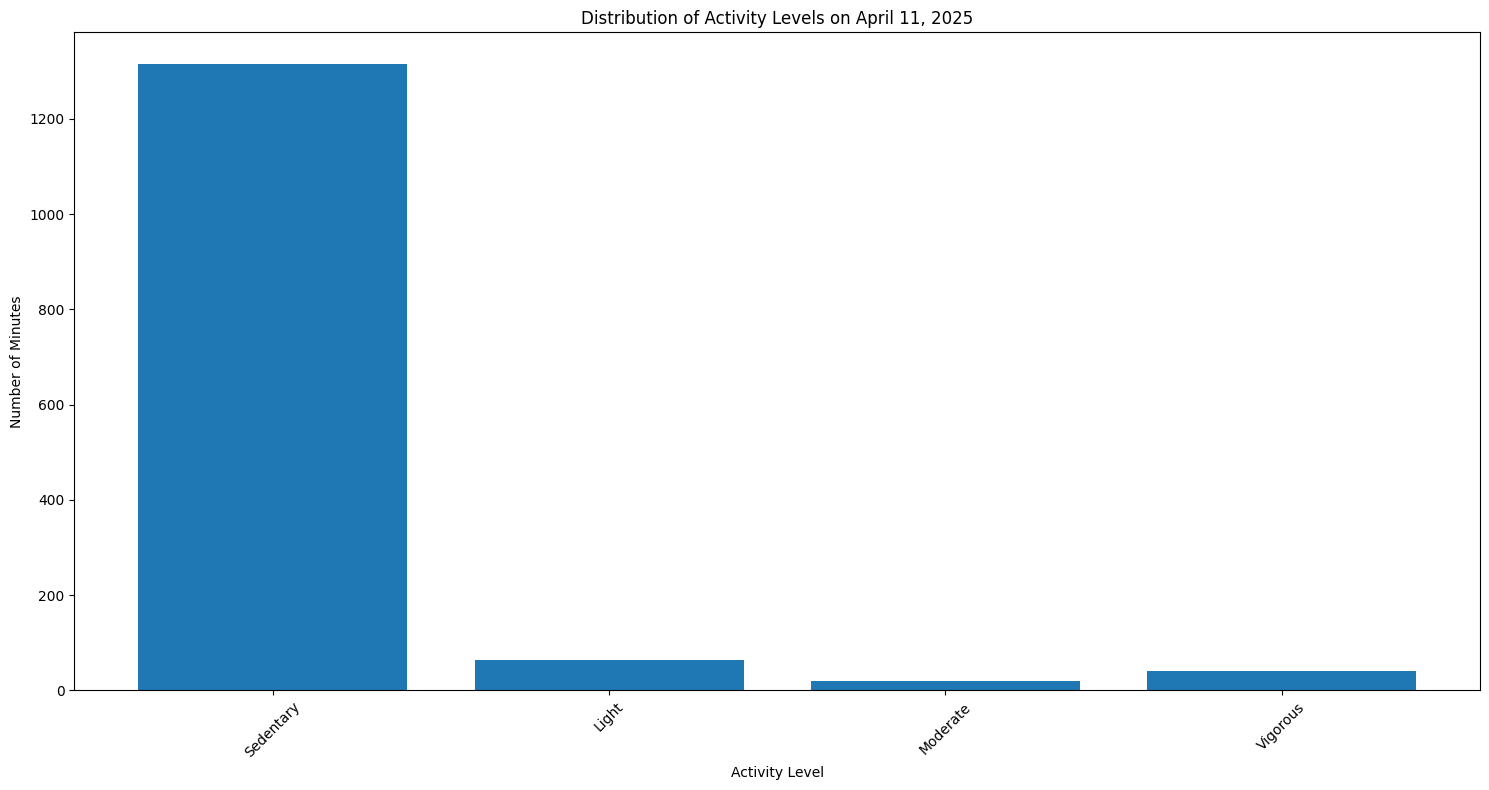

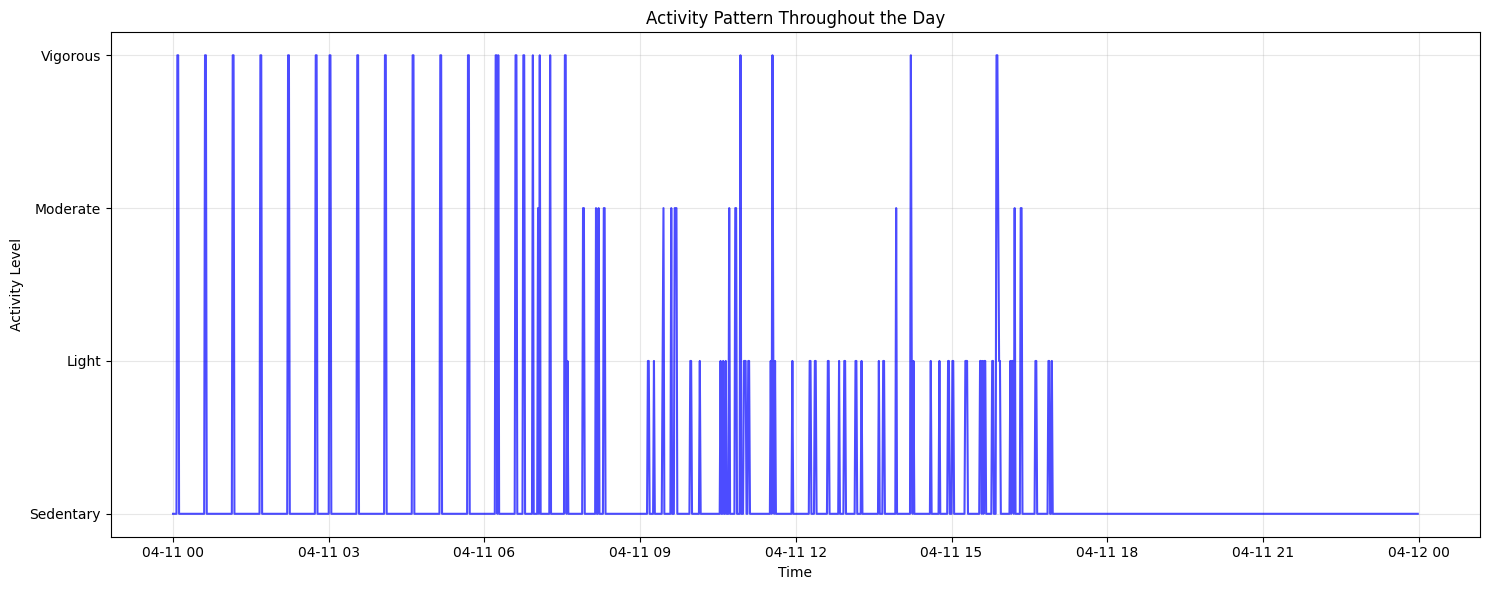


Activity Level Statistics:

Minutes spent in each activity level:
Sedentary: 1316 minutes
Light: 63 minutes
Moderate: 20 minutes
Vigorous: 41 minutes

Percentage of time in each activity level:
Sedentary: 91.4%
Light: 4.4%
Moderate: 1.4%
Vigorous: 2.8%

Activity levels by hour:
activity_class  0.0  1.0  2.0  3.0
hour                              
0                56    0    0    4
1                56    0    0    4
2                56    0    0    4
3                56    0    0    4
4                56    0    0    4
5                56    0    0    4
6                52    0    0    8
7                52    1    3    4
8                56    0    4    0
9                49    6    5    0
10               52    4    3    1
11               50    9    0    1
12               51    9    0    0
13               53    6    1    0
14               53    6    0    1
15               43   14    1    2
16               49    8    3    0
17               60    0    0    0
18               60 

<Figure size 1500x800 with 0 Axes>

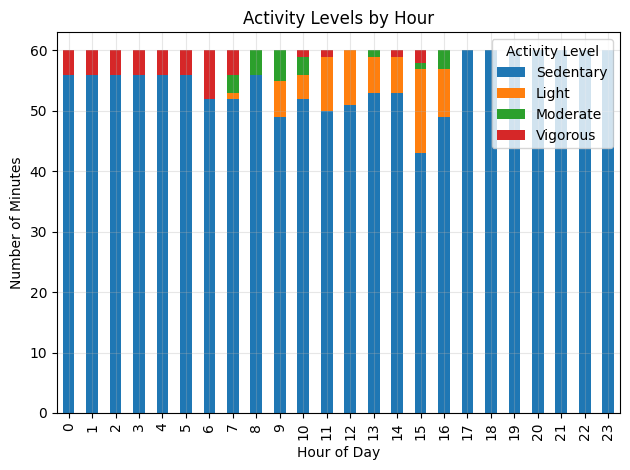

: 

In [ ]:
# 1. Filter and sort data for April 11
df_april11 = df[df['ts'].dt.date == pd.to_datetime('2025-04-11').date()].sort_values('ts')

# 2. Calculate vector magnitude and remove gravity
df_april11['vm'] = (df_april11['x']**2 + df_april11['y']**2 + df_april11['z']**2)**0.5

# Remove gravity using high-pass filter
fs = 50  # sampling frequency (Hz)
cutoff = 0.5  # cutoff frequency (Hz)
nyquist = fs/2
normal_cutoff = cutoff/nyquist
b, a = signal.butter(4, normal_cutoff, btype='high', analog=False)
df_april11['activity'] = signal.filtfilt(b, a, df_april11['vm'])

# 3. Create overlapping 10-second windows
window_size = 10 * fs  # 10 seconds * sampling frequency
step_size = 5 * fs    # 5 seconds overlap

# Initialize lists to store features and timestamps
features = []
timestamps = []

# Extract features for each window
for i in range(0, len(df_april11) - window_size, step_size):
    window = df_april11.iloc[i:i+window_size]
    
    # Calculate features
    mean_activity = window['activity'].mean()
    std_activity = window['activity'].std()
    max_activity = window['activity'].max()
    min_activity = window['activity'].min()
    range_activity = max_activity - min_activity
    
    features.append([mean_activity, std_activity, range_activity])
    timestamps.append(window['ts'].iloc[0])

# Convert to numpy array
features = np.array(features)

# 4. Classify activity levels using thresholds
def classify_activity(feature_vector):
    mean_act, std_act, range_act = feature_vector
    
    if mean_act < 0.5 and std_act < 0.3:
        return 0  # Sedentary
    elif mean_act < 1.5 and std_act < 0.8:
        return 1  # Light
    elif mean_act < 3.0 and std_act < 1.5:
        return 2  # Moderate
    else:
        return 3  # Vigorous

# Initial classification
initial_classes = np.array([classify_activity(f) for f in features])

# 5. Apply Hidden Markov Model for smoothing
n_states = 4  # number of activity states
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)
model.fit(features)

# Get smoothed states
smoothed_states = model.predict(features)

# 6. Create DataFrame with classifications
df_classified = pd.DataFrame({
    'timestamp': timestamps,
    'activity_class': smoothed_states
})

# 7. Create a complete minute-by-minute DataFrame for the entire day
start_time = pd.Timestamp('2025-04-11 00:00:00')
end_time = pd.Timestamp('2025-04-11 23:59:59')
all_minutes = pd.date_range(start=start_time, end=end_time, freq='1T')

# Create DataFrame with all minutes
df_all_minutes = pd.DataFrame({'timestamp': all_minutes})

# Merge with classified data
df_minute = pd.merge(df_all_minutes, df_classified.set_index('timestamp').resample('1T').agg(
    lambda x: Counter(x).most_common(1)[0][0] if len(x) > 0 else np.nan
).reset_index(), on='timestamp', how='left')

# Fill NaN values with 0 (Sedentary) for minutes with no data
df_minute['activity_class'] = df_minute['activity_class'].fillna(0)

print(f"\nTotal minutes in the day: {len(df_minute)}")
print(f"Minutes with activity data: {df_minute['activity_class'].notna().sum()}")
print(f"Minutes marked as sedentary (no data): {len(df_minute) - df_minute['activity_class'].notna().sum()}")

# 8. Create visualizations
activity_labels = ['Sedentary', 'Light', 'Moderate', 'Vigorous']

# Plot activity levels throughout the day
plt.figure(figsize=(15, 8))
activity_counts = df_minute['activity_class'].value_counts()
plt.bar(activity_counts.index, activity_counts.values)
plt.xticks(range(4), activity_labels, rotation=45)
plt.title('Distribution of Activity Levels on April 11, 2025')
plt.xlabel('Activity Level')
plt.ylabel('Number of Minutes')
plt.tight_layout()
plt.show()

# Plot activity pattern throughout the day
plt.figure(figsize=(15, 6))
plt.plot(df_minute['timestamp'], df_minute['activity_class'], 'b-', alpha=0.7)
plt.yticks(range(4), activity_labels)
plt.title('Activity Pattern Throughout the Day')
plt.xlabel('Time')
plt.ylabel('Activity Level')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Print statistics
print("\nActivity Level Statistics:")
print("\nMinutes spent in each activity level:")
for i, label in enumerate(activity_labels):
    count = (df_minute['activity_class'] == i).sum()
    print(f"{label}: {count} minutes")

print("\nPercentage of time in each activity level:")
for i, label in enumerate(activity_labels):
    percentage = (df_minute['activity_class'] == i).mean() * 100
    print(f"{label}: {percentage:.1f}%")

# 10. Create hourly summary
df_minute['hour'] = df_minute['timestamp'].dt.hour
hourly_activity = df_minute.groupby(['hour', 'activity_class']).size().unstack(fill_value=0)
print("\nActivity levels by hour:")
print(hourly_activity)

# Plot hourly activity distribution
plt.figure(figsize=(15, 8))
hourly_activity.plot(kind='bar', stacked=True)
plt.title('Activity Levels by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Minutes')
plt.legend(activity_labels, title='Activity Level')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
# Check the data for April 11
df_april11 = df[df['ts'].dt.date == pd.to_datetime('2025-04-11').date()]
print(f"Total number of readings for April 11: {len(df_april11)}")
print(f"Time range: from {df_april11['ts'].min()} to {df_april11['ts'].max()}")
print(f"Duration: {(df_april11['ts'].max() - df_april11['ts'].min()).total_seconds() / 60:.2f} minutes")

# Check if timestamps are properly sorted
print("\nAre timestamps sorted?", df_april11['ts'].is_monotonic_increasing)

# Check for any gaps in the data
time_diffs = df_april11['ts'].diff()
print("\nMaximum time gap between readings:", time_diffs.max())
print("Average time gap between readings:", time_diffs.mean())

Total number of readings for April 11: 324430
Time range: from 2025-04-11 00:05:26.981000 to 2025-04-11 16:57:04.107000
Duration: 1011.62 minutes

Are timestamps sorted? False

Maximum time gap between readings: 0 days 00:00:01.044000
Average time gap between readings: -1 days +23:59:59.813276508
